In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [9]:
import re

pattern = re.compile('sim_outputs_1_[0-9]+\.txt\.gz')
bool(pattern.match('sim_outputs_15_100.txt.gz'))

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_13661/1634066541.py:3: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile('sim_outputs_1_[0-9]+\.txt\.gz')


True

In [27]:
# Create a dataframe out of the ones for a specified step size 
import gzip 
import re
step_size = 15

specified_files = []
for file in gz_files:    
    pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')

    if bool(pattern.match(file)):
        specified_files.append(file)

sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_13661/1806833139.py:10: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')


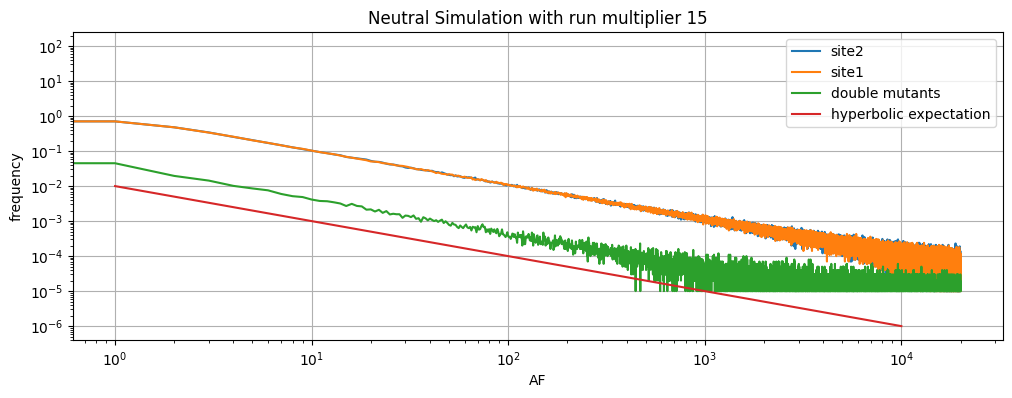

In [28]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

x = np.linspace(1, 10000, 10000)
y = 0.01/x

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])


plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
plt.plot(x, y, label="hyperbolic expectation")

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF")
plt.ylabel("frequency")
plt.title(f"Neutral Simulation with run multiplier {step_size}")
plt.savefig(f"plots/neutral_sim_AFs_{step_size}.pdf")
plt.show()

## Selection plots

In [2]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs/selection'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]

In [7]:
[float(20000*x**2) for x in beta_vals]

[0.10000018089800002,
 0.359380724402,
 1.291549134402,
 4.64158652445,
 16.681007136098003,
 59.948424933282,
 215.443462544928,
 774.2636650871119,
 2782.559410438088,
 9999.999966439369]

In [9]:
# We now proceed to get all dataframes for a specific site pair
beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]
site_1 = 1
site_2 = 1

site_1_pos = True
site_2_pos = False

import re

# pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

# specified_files = []
# for file in gz_files:    
#     if bool(pattern.match(file)):
#         specified_files.append(file)

# # Build the dataframe
# sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

# for file in specified_files[1:]:
#     try:
#         new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
#         sim_df = pd.concat([sim_df, new_df])
#     except:
#         print(f"error file {file}")

def buildDF(site_1, site_2, gz_files):
    pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:    
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

    for file in specified_files[1:]:
        try:
            new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
            sim_df = pd.concat([sim_df, new_df])
        except:
            print(f"error file {file}") 

    return sim_df

<>:29: SyntaxWarning: invalid escape sequence '\.'
<>:29: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_26078/148697796.py:29: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')


In [9]:
# # Let's create folders for all of the pairs of values
# import os

# parent_dir = './plots/selection/'
# for i in range(10):
#     for j in range(i, 10):
#         directory = f'{i}_{j}'
#         path = os.path.join(parent_dir, directory)
#         os.mkdir(path)


In [4]:
# Finally, we plot after subsetting for the signage we want
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

def buildSelectionPlot(beta_vals, sim_df, site_1, site_2, concordant):
    if concordant:
        sim_df = sim_df[((sim_df['beta_1'] > 0) * (sim_df['beta_2'] > 0)) + ((sim_df['beta_1'] < 0) * (sim_df['beta_2'] < 0))]
        label = 'concordant'
    else:
        sim_df = sim_df[((sim_df['beta_1'] < 0) * (sim_df['beta_2'] > 0)) + ((sim_df['beta_1'] > 0) * (sim_df['beta_2'] < 0))]
        label = 'discordant'

    # x = np.linspace(1, 10000, 10000)
    # y = 0.01/x

    ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
    ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
    ks_3, vs_3 = line_scat(sim_df["N11"])


    plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
    plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
    plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
    # plt.plot(x, y, label="hyperbolic expectation")

    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.legend()
    plt.xlabel("AF")
    plt.ylabel("frequency")
    plt.title(f"Simulation with beta_1 = {beta_vals[site_1]} and beta_2 = {beta_vals[site_2]}")
    plt.savefig(f"plots/selection/{site_1}_{site_2}/selection_sim_AFs_{site_1}_{site_2}_{label}.pdf")
    plt.close()


In [5]:
import re

# Let's make plots for all pairs and all signs
for site_1 in range(10):
    for site_2 in range(site_1, 10):
        # Build the dataframes
        pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

        specified_files = []
        for file in gz_files:    
            if bool(pattern.match(file)):
                specified_files.append(file)

        # Build the dataframe
        sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

        for file in specified_files[1:]:
            try:
                new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
                sim_df = pd.concat([sim_df, new_df])
            except:
                print(f"error file {file}")
        
        # Now plot what we want
        for concordant in [True, False]:
            buildSelectionPlot(beta_vals, sim_df, site_1, site_2, concordant)  

        print(f'finished pair ({site_1}, {site_2})')

<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_17843/2265628779.py:7: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')


finished pair (0, 0)
finished pair (0, 1)
finished pair (0, 2)
finished pair (0, 3)
finished pair (0, 4)
finished pair (0, 5)
finished pair (0, 6)
finished pair (0, 7)
finished pair (0, 8)
finished pair (0, 9)
finished pair (1, 1)
finished pair (1, 2)
finished pair (1, 3)
finished pair (1, 4)
finished pair (1, 5)
finished pair (1, 6)
finished pair (1, 7)
finished pair (1, 8)
finished pair (1, 9)
finished pair (2, 2)
finished pair (2, 3)
finished pair (2, 4)
finished pair (2, 5)
finished pair (2, 6)
finished pair (2, 7)
finished pair (2, 8)
finished pair (2, 9)
finished pair (3, 3)
finished pair (3, 4)
finished pair (3, 5)
finished pair (3, 6)
finished pair (3, 7)
finished pair (3, 8)
finished pair (3, 9)
finished pair (4, 4)
finished pair (4, 5)
finished pair (4, 6)
finished pair (4, 7)
finished pair (4, 8)
finished pair (4, 9)
finished pair (5, 5)


## Integrating the SFS

/tmp/ipykernel_9502/56022166.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


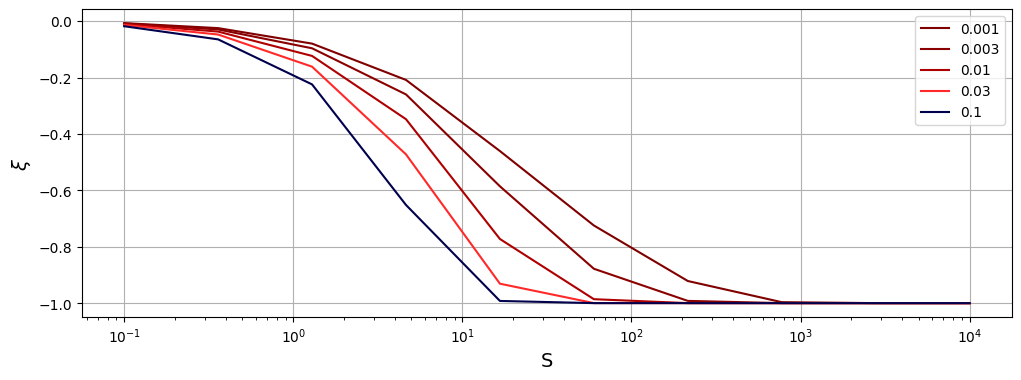

In [38]:
# This is the code to calculate the correlations from selection vals
import numpy as np
import scipy as sp
from scipy.special import erf
import scipy.integrate as spi
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, LogNorm


def sfs_ud_params_sigma(xx, theta, S_ud):
    """Calculate the intensity of the site frequency spectrum under underdominant selection."""
    S_ud = np.abs(S_ud) + 1e-8
    return (theta*np.exp(-S_ud*xx*(1-xx))/(xx*(1-xx))*
                 (1 + erf(np.sqrt(S_ud)*(0.5-xx))/
                 erf(np.sqrt(S_ud)/2)))

ud_burden = lambda xx, theta, sigma: xx*sfs_ud_params_sigma(xx, theta, sigma)

def poly_prob(yy, sigma):
    return quad(sfs_ud_params_sigma, yy, 1-yy, args=(1, sigma))[0]

def ex_burden(sigma):
    return quad(ud_burden, 0, 1, args=(1, sigma))[0]

def stab_corr(yy, sigma, D_pos):
    burd = ex_burden(sigma)
    neut_prob = poly_prob(yy, 0)
    double_prob = poly_prob(yy, 4*sigma)
    single_prob = poly_prob(yy, sigma)
    if D_pos:
        return (double_prob - neut_prob) / (double_prob + neut_prob)
    else:
        return burd * (double_prob - neut_prob) / (burd * (double_prob + neut_prob) + single_prob**2)

    # As a param in stab_corr, include a boolean whether we cond on D > 0 or not
    # If D > 0, we don't include single_prob**2 in the denominator and get rid of 
    # burden multiplication

def stab_corr_posLD_poly(yy, SS):
    def ex_diff(xx):
        return xx * (poly_prob(yy, (2*np.sqrt(SS)-xx*np.sqrt(SS))**2 ) - poly_prob(yy, xx**2*SS)) * sfs_ud_params_sigma(xx, 1, SS)
    def ex_sum(xx):
        return xx * (poly_prob(yy, (2*np.sqrt(SS)-xx*np.sqrt(SS))**2 ) + poly_prob(yy, xx**2*SS)) * sfs_ud_params_sigma(xx, 1, SS)
    return spi.quad(ex_diff, 0, 1)[0] / spi.quad(ex_sum, 0, 1)[0]


cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 10)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()

In [2]:
## We're going to work with the simulations to plot the above curves
# 1. Find all instances where both variants satisfy the MAF threshold
# 2. Calculate correlations
# 3. Calculate the selection coefficients
# 4. Plot and use Fisher transformation for error bars
from scipy.stats import pearsonr

# Step 1
filename = 'betas.txt'
beta_vals = np.loadtxt(filename, delimiter='\t', dtype=float)
beta_vals = beta_vals.tolist()

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]

corr_df_pos = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_neg = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
# sample_df = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
for site in np.arange(len(beta_vals)):
        try:
            sim_df = pd.read_csv(f'/n/scratch/users/s/sjg319/dataframes/underdominant/sim_{site}_{site}.csv', sep='\t')
            sim_df[['N00', 'N01', 'N10', 'N11']] /= 20000
            for i, MAF_thr in enumerate(MAF_thr_values):
                # For the D > 0 case
                sub_df_pos = sim_df[(sim_df['N11']) > MAF_thr]
                
                # Step 2, calculate the correlation and store
                r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])
                corr_df_pos.iloc[i, site] = r[0]
                # sample_df.iloc[i, site] = len(sub_df)

                # For the D < 0 case
                sub_df_neg = sim_df[(sim_df['N01']) > MAF_thr]
                sub_df_neg = sub_df_neg[(sub_df_neg['N10']) > MAF_thr]

                r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])
                corr_df_neg.iloc[i, site] = r[0]
        except:
            print(f"didn't work for site {site}")

didn't work for site 16
didn't work for site 19
didn't work for site 23
didn't work for site 24
didn't work for site 25
didn't work for site 26
didn't work for site 27
didn't work for site 28
didn't work for site 29
didn't work for site 30
didn't work for site 31
didn't work for site 32
didn't work for site 33
didn't work for site 34
didn't work for site 35


/tmp/ipykernel_9502/381173910.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])


didn't work for site 36
didn't work for site 37
didn't work for site 38
didn't work for site 39
didn't work for site 40
didn't work for site 41
didn't work for site 42
didn't work for site 43
didn't work for site 44
didn't work for site 45
didn't work for site 46
didn't work for site 47
didn't work for site 48
didn't work for site 49


In [5]:
# corr_df_neg.to_csv('dataframes/corr_csv_neg_d.csv')
corr_df_pos.to_csv('dataframes/corr_csv_pos_d.csv')

In [67]:
# # Change the corr_df axis so it's based on selection instead of beta
new_cols = [40000 * x**2 for x in beta_vals]
corr_df_pos.columns = new_cols
corr_df_neg.columns = new_cols

corr_df_pos[corr_df_pos == 0.0] = np.nan
corr_df_neg[corr_df_neg == 0.0] = np.nan

# dw = [16, 19, 47]
# dw = [new_cols[x] for x in dw]
# corr_df = corr_df.loc[:, [y not in dw for y in new_cols]]

# [0.0 in corr_df_pos[x] for x in corr_df_pos.columns]
# corr_df_neg.iloc[:, 30:40]

# corr_df.columns = corr_df.columns * 2

# # Let's build error bars for each data point
# z = 1.96
# z_df = 0.5*np.log((1 + corr_df)/(1-corr_df))
# top_df = z_df + z/(np.sqrt(sample_df * (sample_df-3)))
# top_df = np.tanh(top_df)
# bottom_df = z_df - z/(np.sqrt(sample_df * (sample_df-3)))
# bottom_df = np.tanh(bottom_df)

In [46]:
# Calculate the Fisher z transformation for error bars
for site in np.arange(len(beta_vals)):
    sim_df = buildDF(site, site, gz_files)
    sim_df.to_csv(f'dataframes/sim_dfs/sim_{site}_{site}.csv', sep='\t')
    print(f'built dataframe for {site}')

built dataframe for 0
built dataframe for 1
built dataframe for 2
built dataframe for 3
built dataframe for 4
built dataframe for 5
built dataframe for 6
built dataframe for 7
built dataframe for 8
built dataframe for 9


/tmp/ipykernel_9502/347727565.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


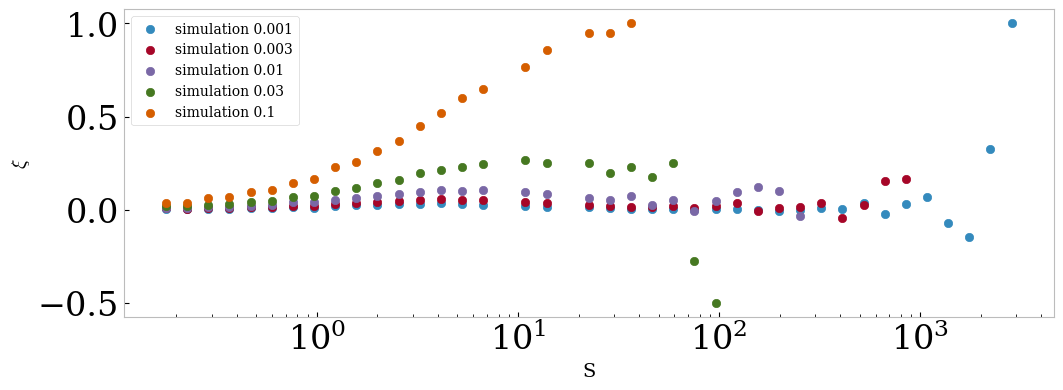

In [73]:
# corr_df.to_csv('dataframes/corr_csv', sep='\t')
# corr_df.T.plot()
# plt.xscale("log")
# corr_df.iloc[:, -1] = -1

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 20)

# for MAF_thr in MAF_thr_values:
#     corr_set = [stab_corr(MAF_thr, sigma) for sigma in sigma_set]
#     plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

for ind in corr_df_neg.index:
    plt.scatter(corr_df_neg.columns, corr_df_neg.loc[ind, :], label=(f'simulation {ind}'))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend(prop={'size': 10})
plt.show()

In [65]:
corr_df_neg

,0.002108,0.002380,0.002686,0.003031,0.003421,0.003861,0.004358,0.004918,0.005551,0.006265,...,0.266693,0.300997,0.339714,0.383410,0.432728,0.488389,0.551210,0.622111,0.702132,0.792447
0.001,0.007869,0.005927,0.006316,0.007711,0.012516,0.013639,0.016390,0.014160,0.022592,0.027400,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003,0.010777,0.007146,0.010381,0.010993,0.016685,0.015803,0.023552,0.021709,0.032257,0.038264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.010,0.013550,0.013459,0.016658,0.019382,0.024479,0.026851,0.041045,0.041236,0.056364,0.063207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.030,0.020636,0.021269,0.028346,0.035587,0.043446,0.051630,0.072565,0.077312,0.105126,0.117408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.100,0.036806,0.040029,0.065164,0.068339,0.095374,0.106704,0.145476,0.167039,0.230221,0.260007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_9502/2576042344.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


Text(0, 0.5, '$\\xi$')

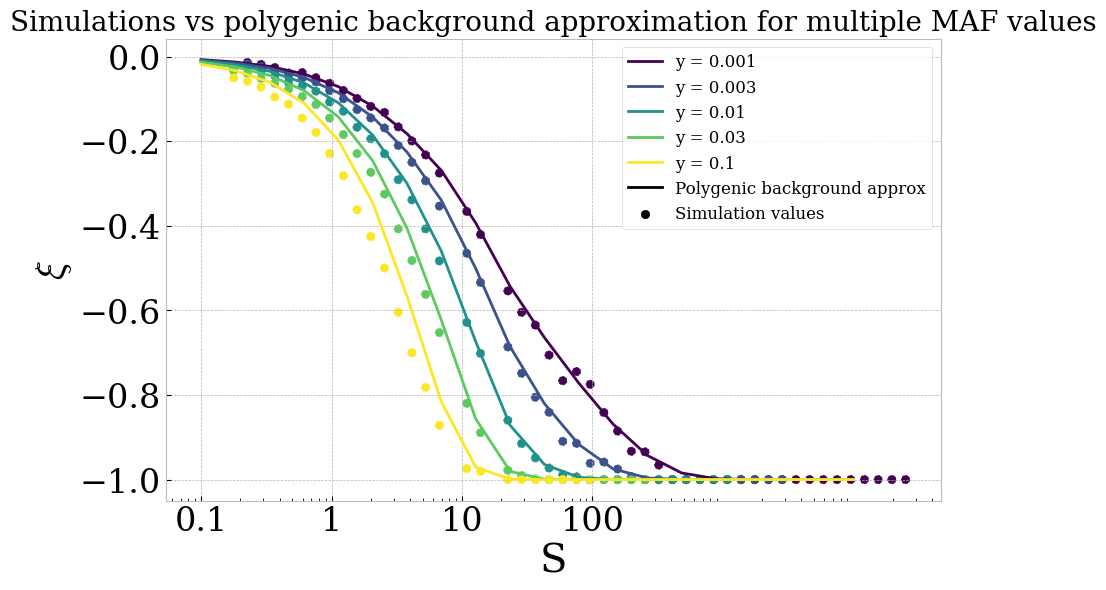

In [76]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 24})
plotfacecolor = "white"
plt.style.use('bmh')

matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["figure.facecolor"] = plotfacecolor
matplotlib.rcParams["axes.facecolor"] = plotfacecolor
matplotlib.rcParams["savefig.facecolor"] = plotfacecolor

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 20)

colors = plt.cm.viridis(np.linspace(0, 1, len(MAF_thr_values)))

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

fig, ax = plt.subplots(figsize=(10, 6))
for ii, yy in enumerate(MAF_thr_values):
    # For the simple background approx
    # corr_set = [stab_corr(MAF_thr_values[ii], sigma, True) for sigma in sigma_set]

    # For the polygenic background approx
    corr_set = [stab_corr_posLD_poly(MAF_thr_values[ii], sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, label=f"y = {yy}", color=colors[ii])
    plt.scatter(corr_df_pos.columns, corr_df_pos.iloc[ii, :], color=colors[ii], linestyle="--")

# label the dashed and solid lines
plt.plot([], [], label="Polygenic background approx", color="black", linestyle="-")
# plt.plot([], [], label="Simple approx", color="black", linestyle="--")
plt.scatter([], [], label='Simulation values', color='black')
plt.title('Simulations vs polygenic background approximation for multiple MAF values', fontsize=20)
plt.legend(fontsize=12)
plt.xscale("log")
plt.xticks([0.1, 1, 10, 100], [ "0.1", "1", "10", "100"])
plt.xlabel("S")
plt.ylabel(r"$\xi$")